# Individual NN Classification Assignment (Fall '23)
**Dr. Dave Wanik - University of Connecticut**

* Full Name: Suryakumar Mane
* Student ID (7 digit number): 3069860

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero.

1. Read the data dictionary and description from here:

* https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip

 Download the data using gdown, read the Excel file using pandas, print the first 10 rows using df.head() and use df.info() to examine the data types and missing values.

2. Simplify the raw dataframe so that you only keep the columns you need. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. Add text cells and lots of comments so we can understand your logic/justification!

3. Recode the target variable to a 1 if greater than the mean value of poverty, otherwise make it a 0. Use this recoded variable as the target variable! Now it is a classification problem.

4. Make two interesting plots or tables and a description of why you made the table and what you see.

5. Do an 90/10 split for X_train, X_test, y_train, y_test where the random seed is equal to your 7 digit studentID number.

6. Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!

7. Build a model using the Sequential API (like we do in class) with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

8. Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. **Don’t forget the early stopping callback!**

9. Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class). You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently?  If you don't have text cells here, you will lose points.

10. Calculate what a baseline prediction would be for the train and test partitions (a mean only model). Did your model do better than the baseline predictions? If so, you have a useful model!

#Q1. Reading Data and Importing Modules
Read Data and Import Modules

In [ ]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# for data prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# https://drive.google.com/file/d/1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E/view?usp=sharing
!gdown --id 1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E # ID for Environmental Health data! look up!
df_CalEnviroScreen = pd.read_excel('CalEnviroScreen.xlsx')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E
To: /content/CalEnviroScreen.xlsx
100% 6.19M/6.19M [00:00<00:00, 38.6MB/s]


In [ ]:
# read data
df = pd.read_excel('CalEnviroScreen.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

Printing First 10 Records

In [ ]:
df.head(10)

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752
5,6037204920,2598,Los Angeles,90023,Los Angeles,-118.197497,34.017500,80.726872,99.936940,95-100% (highest scores),...,89.148114,66.4,90.232558,11.6,67.419723,22.0,67.034780,82.361214,8.541407,94.892168
6,6077000300,2396,San Joaquin,95203,Stockton,-121.302072,37.952421,80.178935,99.924328,95-100% (highest scores),...,92.401013,76.2,97.033312,14.4,82.002792,24.3,74.727088,91.940147,9.534806,99.646866
7,6019001000,4106,Fresno,93706,Fresno,-119.804314,36.697751,80.134819,99.911716,95-100% (highest scores),...,76.576456,74.5,95.901948,20.0,95.494352,31.8,90.720995,93.793697,9.727032,99.911716
8,6037206050,2146,Los Angeles,90023,Los Angeles,-118.224453,34.029904,79.025293,99.899105,95-100% (highest scores),...,97.120384,75.7,96.643620,28.5,99.505013,31.7,90.555979,80.249569,8.322415,92.962543
9,6019000400,6343,Fresno,93721,Fresno,-119.776209,36.727656,78.529850,99.886493,95-100% (highest scores),...,71.350487,83.4,99.082338,23.5,98.273893,23.2,71.337903,83.195409,8.627918,95.711943


Missing values across all the columns

In [ ]:
df.isnull().sum()

Census Tract                                           0
Total Population                                       0
California County                                      0
ZIP                                                    0
Nearby City \n(to help approximate location only)      0
Longitude                                              0
Latitude                                               0
CES 3.0 Score                                        106
 CES 3.0 Percentile                                  106
CES 3.0 \nPercentile Range                           106
SB 535 Disadvantaged Community                         0
Ozone                                                  0
Ozone Pctl                                             0
PM2.5                                                 19
PM2.5 Pctl                                            19
Diesel PM                                              0
Diesel PM Pctl                                         0
Drinking Water                 

Total missing records with atleast one missing value are 2724

In [ ]:
df.isnull().sum().sum() # total records with at least one missing value

2724

# Q2. Subsetting and Column info
Simplify the raw dataframe so that you only keep the columns you need. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. Add text cells and lots of comments so we can understand your logic/justification!


In [ ]:
#Getting columns names index
column_name=df.columns
print('Column Names:', pd.DataFrame(column_name))

Column Names:                                                     0
0                                        Census Tract
1                                    Total Population
2                                   California County
3                                                 ZIP
4   Nearby City \n(to help approximate location only)
5                                           Longitude
6                                            Latitude
7                                       CES 3.0 Score
8                                  CES 3.0 Percentile
9                          CES 3.0 \nPercentile Range
10                     SB 535 Disadvantaged Community
11                                              Ozone
12                                         Ozone Pctl
13                                              PM2.5
14                                         PM2.5 Pctl
15                                          Diesel PM
16                                     Diesel PM Pctl
17            

Subsetting the dataset with desired columns. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`.

## X and y dataset subsetting

In [ ]:
df1=df[df.columns[[1] + list(range(11, 35)) + [7]+ list(range(38,48))+[48]]] #Getting the required columns

#subsetting the X from the df
X=df1.drop('Poverty',axis=1)

#Separating and Creating a y variable
y=df1['Poverty']



In [ ]:
X.columns

Index(['Total Population', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl',
       'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'CES 3.0 Score', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl'],
      dtype='object')

In [ ]:
X.describe()

,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,...,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl
count,8035.000000,8035.000000,8035.000000,8016.000000,8016.000000,8035.000000,8035.000000,8017.000000,8017.000000,8035.000000,...,8035.000000,8035.000000,7813.000000,7813.000000,8035.000000,8035.000000,7939.000000,7939.000000,7793.000000,7793.000000
mean,4636.459988,0.047454,53.298961,10.377904,53.594976,19.196066,50.020674,472.372259,50.344264,313.973576,...,51.977813,49.934012,4.976329,50.040673,8.265890,49.977830,19.121779,50.051689,10.417862,48.357838
std,1972.587602,0.010283,28.602241,2.598074,29.370030,16.993878,28.882180,249.331572,28.828744,2775.125385,...,30.552249,28.921850,1.551352,28.902252,2.971099,28.917487,15.952094,28.848990,9.982732,29.764977
min,0.000000,0.026421,0.236465,1.651081,0.012475,0.021181,0.012446,6.919810,0.012473,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3358.000000,0.040127,25.874300,8.697944,30.701098,8.811598,25.009334,249.345239,25.009355,0.000000,...,29.855000,24.878444,3.950000,24.977573,6.080000,24.996883,6.300000,25.082009,3.000000,22.516998
50%,4413.000000,0.046178,53.018046,10.370000,52.607285,16.447688,50.006223,479.227886,51.016590,0.000000,...,45.270000,49.931430,4.920000,50.224273,7.940000,49.956365,14.000000,50.000000,7.400000,48.340221
75%,5656.500000,0.055122,77.871811,12.050000,81.661677,24.646576,75.003111,664.069078,78.570538,0.370835,...,65.990000,74.959481,5.930000,75.060874,10.040000,75.065453,28.700000,74.993692,14.900000,74.230103
max,37452.000000,0.067829,100.000000,19.600000,100.000000,253.730796,100.000000,1245.651010,100.000000,91316.186050,...,278.830000,100.000000,14.890000,100.000000,21.260000,100.000000,80.000000,100.000000,72.300000,100.000000


## Missing Values (Desired Columns)

Lets analyse the missing values in the desired columns.

There aren't that many missing values. Total records having missing values are 1412, which is 17.5% of total records i.e. 8035. Here I have chosen to impute the records.

In [ ]:
X.isnull().sum().sum()

1412

In [ ]:
1412/8035

0.1757311761045426

## KNN Imputation for Missing Values

Here we will impute the missing values using KNN imputer. I have separated the columns that contains null values and also obtained the indices of it to verify that values have been imputed and indices are maintained.

In [ ]:
#Getting the names of columns with NULL values
null_columns_X = X.columns[X.isnull().any()]
print('Names of Columns having Null values:/n', null_columns_X)

# Getting the indices of null values
null_indices = X[X.isnull().any(axis=1)].index

# Displaying the top 5 null indices
top_5_null_indices = null_indices[:5]
print("/nTop 5 Null Indices:/n")
print(top_5_null_indices)

Names of Columns having Null values:/n Index(['PM2.5', 'PM2.5 Pctl', 'Drinking Water', 'Drinking Water Pctl',
       'Traffic', 'Traffic Pctl', 'CES 3.0 Score', 'Low Birth Weight',
       'Low Birth Weight Pctl', 'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl'],
      dtype='object')
/nTop 5 Null Indices:/n
Int64Index([29, 37, 75, 80, 82], dtype='int64')


In [ ]:
#Seeing the records before imputation
X.loc[top_5_null_indices] #Notice the last two columns

,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,...,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl
29,4497,0.064889,98.182950,12.890000,92.889222,29.001478,83.223398,960.391766,98.079082,0.000000,...,108.89,94.526867,7.11,91.528899,12.27,89.864107,25.3,70.489528,NaN,NaN
37,2860,0.064889,98.182950,15.400000,97.218064,57.192132,97.013068,681.195604,80.915554,49.060519,...,69.87,78.531355,NaN,NaN,14.23,96.546565,45.9,91.622508,11.7,65.017998
75,1823,0.046178,53.018046,9.536303,40.918164,17.793975,53.976353,80.014449,6.261694,0.413440,...,76.08,82.695425,14.89,100.000000,9.25,66.089016,22.8,66.868534,NaN,NaN
80,1164,0.044312,40.485376,12.050000,81.661677,27.307736,80.746733,473.984973,48.596732,3.757860,...,68.35,77.060217,6.60,86.236063,10.28,76.748535,28.3,74.577340,NaN,NaN
82,3673,0.046178,53.018046,12.050000,81.661677,18.530000,57.199751,626.585402,70.799551,0.080666,...,41.67,44.657773,7.49,94.181725,8.87,61.999751,62.8,98.927580,25.8,91.121184


In [ ]:
#Imputing the missing values in the X
#KNN imputation
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=10,weights='distance')

# Creating a new DataFrame with the selected columns (which has missing values)
data_with_missing_values_X = X.loc[:, null_columns_X]

# Imputing the missing values
imputed_data_X = knn_imputer.fit_transform(data_with_missing_values_X)

In [ ]:
# Creating a new DataFrame with the imputed values
# setting the same index as X
''' This is very important otherwise it will create its new index and
create problem when we replace values in the original X dataset '''
imputed_df_X = pd.DataFrame(imputed_data_X, columns=null_columns_X,index=X.index)

# Replacing the imputed columns in the original DataFrame with the imputed values
X[null_columns_X]=imputed_df_X

#lets view the imputed data with same indices we saw earlier
X.loc[top_5_null_indices]


,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,...,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl
29,4497,0.064889,98.182950,12.890000,92.889222,29.001478,83.223398,960.391766,98.079082,0.000000,...,108.89,94.526867,7.110000,91.528899,12.27,89.864107,25.3,70.489528,7.123863,44.383091
37,2860,0.064889,98.182950,15.400000,97.218064,57.192132,97.013068,681.195604,80.915554,49.060519,...,69.87,78.531355,5.994002,71.837869,14.23,96.546565,45.9,91.622508,11.700000,65.017998
75,1823,0.046178,53.018046,9.536303,40.918164,17.793975,53.976353,80.014449,6.261694,0.413440,...,76.08,82.695425,14.890000,100.000000,9.25,66.089016,22.8,66.868534,16.165276,73.165972
80,1164,0.044312,40.485376,12.050000,81.661677,27.307736,80.746733,473.984973,48.596732,3.757860,...,68.35,77.060217,6.600000,86.236063,10.28,76.748535,28.3,74.577340,14.250893,64.539039
82,3673,0.046178,53.018046,12.050000,81.661677,18.530000,57.199751,626.585402,70.799551,0.080666,...,41.67,44.657773,7.490000,94.181725,8.87,61.999751,62.8,98.927580,25.800000,91.121184


#Q3. Recoding Target Variable
Recode the target variable to a 1 if greater than the mean value of poverty, otherwise make it a 0. Use this recoded variable as the target variable! Now it is a classification problem.


In [ ]:
#Recoding the y variable to catergorical variable
mean_poverty = y.mean()
y= np.where(y > mean_poverty, 1, 0)

#lets see the length of y
len(y)

8035

#Q4. Plots and Tables
Make two interesting plots or tables and a description of why you made the table and what you see.


## 1. Correlation of Variable with Target Variable (Original)

Lets see how variable are correlated witht the target variable (the original one without recoding).

The figure below indicates that ```CES 3.0 Score```and ```Asthama Pctl``` are significantly positively correlated to the ```Poverty```

**Insights on relation to recoded values:**

Since we have assigned 1 to ```Poverty``` greater than the mean of Poverty, the NN  model might assign weights to these two features such that the value of  ```Poverty``` number could increase; thereby, predicting 1.

@Dave please correct me if I am wrong in giving a shot at (infering this!) what might be going inside the model

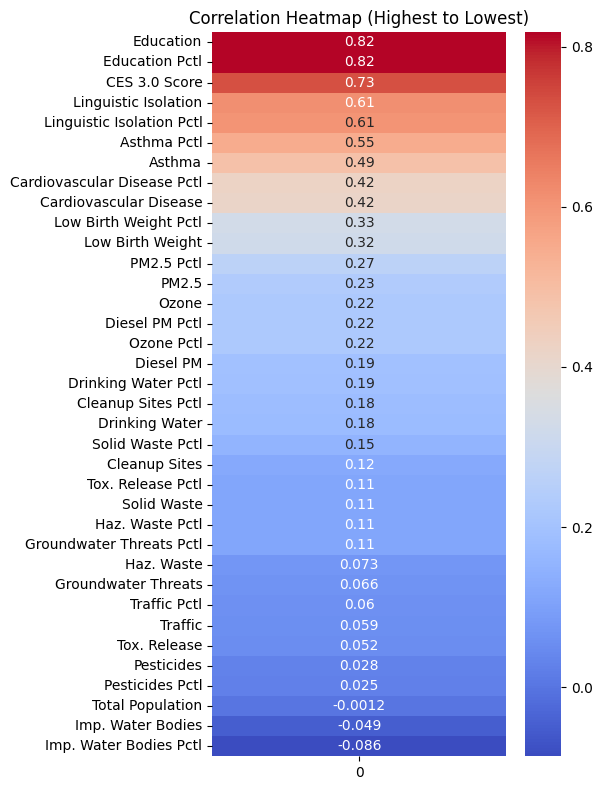

In [ ]:
# Calculate the correlation matrix between X_train features and y_train target variable
corr_matrix = X.corrwith(df1['Poverty'])

# Sort the correlation matrix in descending order
sorted_corr_matrix = corr_matrix.sort_values(ascending=False)

# Create a heatmap of the sorted correlation matrix
fig, ax = plt.subplots(figsize=(6, 8))
sns.heatmap(sorted_corr_matrix.to_frame(), annot=True, cmap='coolwarm', cbar=True, ax=ax)
plt.title('Correlation Heatmap (Highest to Lowest)')
plt.tight_layout()
plt.show()

##2. Bar plot of Target Variable

The count of the target variable (1 and 0) is plotted as a bar plot to better visualise if the dataset is balanced or imbalanced.

Here from the graph we can tell that the dataset is nearly balanced.

It is important to have the dataset balanced in order to predict both the classes without bias. In case of imbalanced data, the class with more data wou

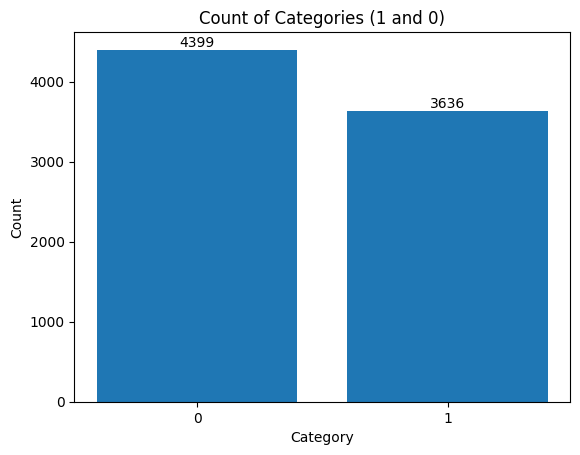

In [ ]:
value_counts = np.bincount(y)

# Create a bar plot
plt.bar(range(len(value_counts)), value_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Categories (1 and 0)')
plt.xticks(range(len(value_counts)))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

##3. Correlation (all variables) Plot

This plot gives an idea about what features are correlated with each other with what degree of correlation. It should be noted here that Pctl columns are percentile of its counterparts (example, PM2.5 has PM2.5 Pctl). It occured to me that as these are just repeated information in the data, could this be gotten rid of and then build a model. A thought behind this is keeping features which are same just coded differently might make mode more complex or might make it biased for some features. I will run a same model with these features removed towards the end of this collab just for the experiment.


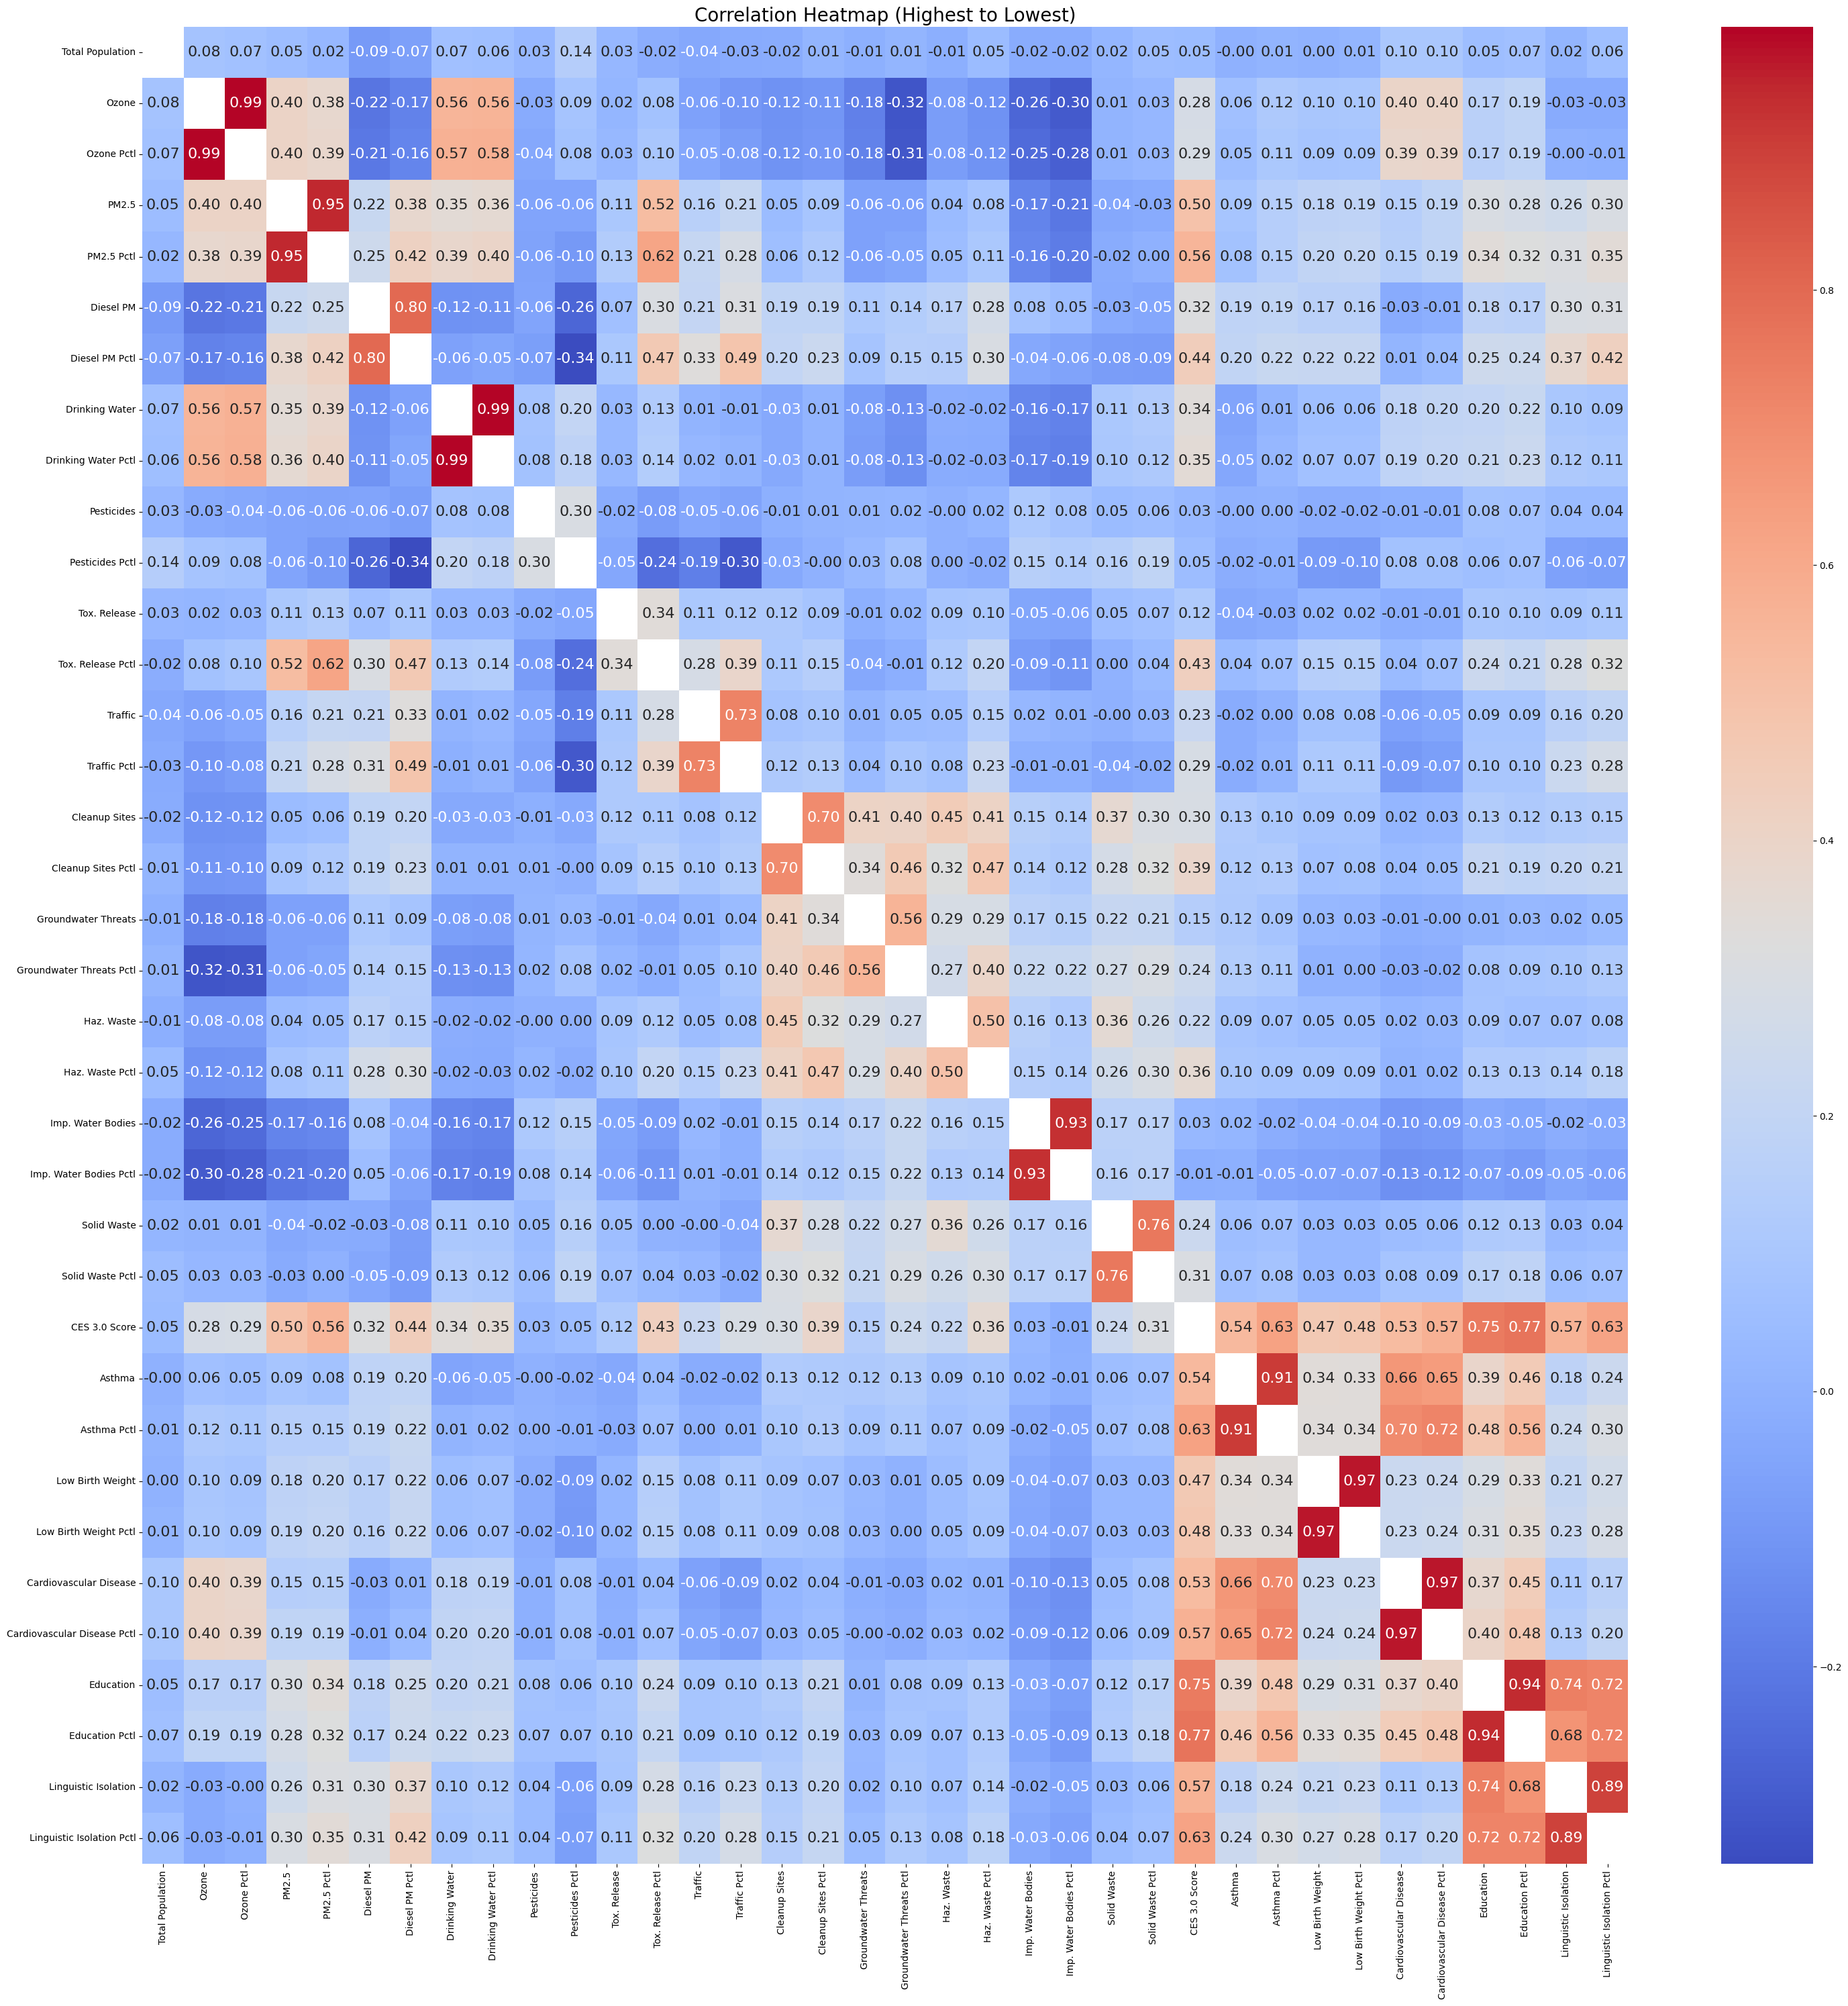

In [ ]:
# Calculating the correlation matrix for all features
corr_matrix = X.corr()

# Sort the correlation matrix in descending order
sorted_corr_matrix = corr_matrix.unstack().sort_values(ascending=False)

# Removing the correlation values with itself (diagonal elements)
sorted_corr_matrix = sorted_corr_matrix[~(sorted_corr_matrix.index.get_level_values(0) == sorted_corr_matrix.index.get_level_values(1))]

# Creating a heatmap of the sorted correlation matrix
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(sorted_corr_matrix.unstack(), annot=True, cmap='coolwarm', cbar=True, ax=ax, annot_kws={"size":16},fmt='.2f')
plt.title('Correlation Heatmap (Highest to Lowest)',fontsize=20)
plt.tight_layout()
plt.show()

#Q5. Spliiting Data
Do an 90/10 split for X_train, X_test, y_train, y_test where the random seed is equal to your 7 digit studentID number.

In [ ]:
#splitting dataset in train and test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=3069860)

Saving these split of train and test dataset in another variables X2 for other model that thought to experiment with (by removing the correlated features, mainly corresponding Pctl metric). In later part (in Appendix), the columns containng the Pctl were removed and same model (defined under different name) was run on this data to compare the performance.

In [ ]:
#Saving these train and test dataset in another dataframe for another model (in Appendix)
X2_train=X_train
X2_test=X_test

In [ ]:
#making sure that the data is split correctly
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7231, 36) (7231,)
(804, 36) (804,)


#Q6. Scaling
Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!


In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

#Q7. Build and Compile the Model
Build a model using the Sequential API (like we do in class) with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

In [ ]:
X_train.shape[1]

36

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.15)) # specify a percentage between 0 and 0.5
model.add(Dense(64, activation='relu')) # output node
model.add(Dropout(0.2)) # specify a percentage between 0 and 0.5
model.add(Dense(32, activation='relu')) # output node
model.add(Dropout(0.2)) # specify a percentage between 0 and 0.5
model.add(Dense(1, activation='sigmoid')) # output node
model.summary() # see what your model looks like


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4736      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Q8. Fitting the Model
Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. **Don’t forget the early stopping callback!**

In [ ]:
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=20,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=100000, # you can set this to a big number!
                    batch_size=256*2*2*2,
                    validation_data=(X_test,y_test),
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
4/4 [==============================] - 2s 116ms/step - loss: 0.7006 - accuracy: 0.5861 - val_loss: 0.5806 - val_accuracy: 0.7575
Epoch 2/100000
4/4 [==============================] - 0s 30ms/step - loss: 0.5762 - accuracy: 0.7252 - val_loss: 0.4961 - val_accuracy: 0.8072
Epoch 3/100000
4/4 [==============================] - 0s 27ms/step - loss: 0.5012 - accuracy: 0.7844 - val_loss: 0.4393 - val_accuracy: 0.8197
Epoch 4/100000
4/4 [==============================] - 0s 33ms/step - loss: 0.4569 - accuracy: 0.7998 - val_loss: 0.4054 - val_accuracy: 0.8184
Epoch 5/100000
4/4 [==============================] - 0s 33ms/step - loss: 0.4207 - accuracy: 0.8199 - val_loss: 0.3871 - val_accuracy: 0.8184
Epoch 6/100000
4/4 [==============================] - 0s 23ms/step - loss: 0.4016 - accuracy: 0.8291 - val_loss: 0.3742 - val_accuracy: 0.8259
Epoch 7/100000
4/4 [==============================] - 0s 28ms/step - loss: 0.3828 - accuracy: 0.8361 - val_loss: 0.3631 - val_accuracy: 0.837

#Q9. Evaluating the Model
Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class). You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently?  If you don't have text cells here, you will lose points.


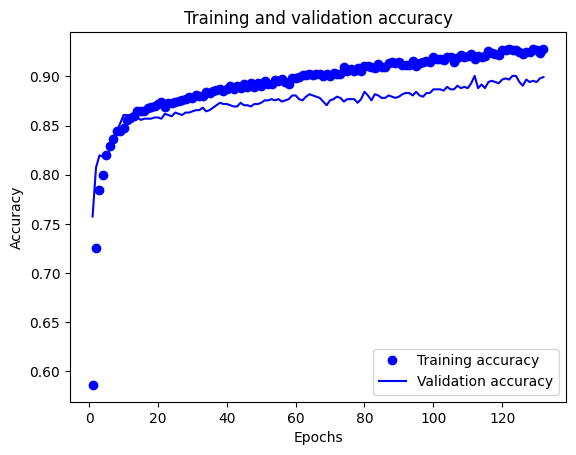

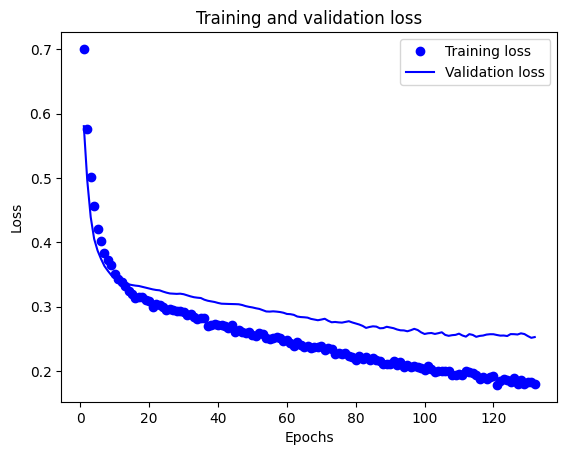

In [ ]:
# learning curve

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see in the learning curves that the model has pretty quickly learnt the pattern and loss has been reduced and accuracy has increased sharply.

We can see from the confusion matrix that it has performed well on the train dataset achieving 0.95 F1 score. It also performs better on the test dataset with F1 score of 90. We have taken care of overfitting by dropout methods and it can be seen from F1 score of the train data that it has not overfit and predicts pretty good on test data. That being said, the accuracy on train is more than test, and also the loss on train is lesser than the test data.


#Q10. Baseline Model and  Classification Report
Calculate what a baseline prediction would be for the train and test partitions (a mean only model). Did your model do better than the baseline predictions? If so, you have a useful model!

In [ ]:
#Base line prediction for train
y_train=pd.DataFrame(y_train)
count_train=y_train.value_counts()

baseline_pred_train=count_train[0]/(count_train[0]+count_train[1])
print('Baseline prediction for train:/n', baseline_pred_train)

#Base line prediction for test
y_test=pd.DataFrame(y_test)
count_test=y_test.value_counts()

baseline_pred_test=count_train[0]/(count_train[0]+count_train[1])
print('Baseline prediction for test:/n', baseline_pred_test)

Baseline prediction for train:/n 0.5477803899875536
Baseline prediction for test:/n 0.5477803899875536


In [ ]:
## seeing how the model did! on train
preds_train = np.round(model.predict(X_train),0)

matrix = confusion_matrix(y_train,preds_train)
matrix

226/226 [==============================] - 0s 1ms/step


array([[3723,  238],
       [ 195, 3075]])

In [ ]:
## seeing how the model did! on test
preds_test = np.round(model.predict(X_test),0)

matrix = confusion_matrix(y_test,preds_test)
matrix

26/26 [==============================] - 0s 2ms/step


array([[397,  41],
       [ 39, 327]])

In [ ]:
#Printing the classification report on the train  data
print('Classification Report on Train:\n',classification_report(y_train , preds_train))

#Printing the classification report on the test data
print('Classification Report on Test:\n',classification_report(y_test, preds_test))

Classification Report on Train:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      3961
           1       0.93      0.94      0.93      3270

    accuracy                           0.94      7231
   macro avg       0.94      0.94      0.94      7231
weighted avg       0.94      0.94      0.94      7231

Classification Report on Test:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       438
           1       0.89      0.89      0.89       366

    accuracy                           0.90       804
   macro avg       0.90      0.90      0.90       804
weighted avg       0.90      0.90      0.90       804



# Conclusion/Insights

Extending the insgihts from model evaluation, following are some thoughts about this assignment

1. After comparing the models (with same parameters; another model run in appendix below which did not include Pctl metric), It was observed that the first model (where the correlated features where present) had a tendency to overfit the train data (as the network got comple with more layers and units). The later model (where correlated features where removed), it gave pretty consistant performance of predicting train and test with similar numbers. The overfitting was not observed in later model (run in the appendix at the end).

2. Also, it was observed that more the comlex model is (with more layers and units with dropouts), better was the performance of predictions in train and to some extent in test data.


3. Compared to the baseline model, the F1 score of the model is 90 on test data. We can safely conclude that model performs better and has recognized patterns in the data to predict values.

4. In both the models (above and in the appendix), the validation accuracy is less than the training. Also, the validation loss is more (as in the loss number) than the training data.

5. The first model (where correlated features such as Pctl is present) has 36 total number of features. Whereas, after removing the correlated features (for which count is 17), the total number of feature in model_2 are 19. This might explain the consistency of the model between the train and test data. In that, the model is not fed with lot of noise. (@Dave please correct me if this inference is wrong; I would love to know more and learn from your feedback).

##**Appendix (Other model)**

Checking the same model performance when we get rid of the similar metric called Pctl against some of the features.

In [ ]:
#selecting columnns without Pctl metric
X_columns_wo_Pctl = [col for col in X.columns if "Pctl" not in col]
X2_train=X2_train[X_columns_wo_Pctl]
X2_test=X2_test[X_columns_wo_Pctl]
#lets view the 5 records
X2_train.head(5)

,Total Population,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,CES 3.0 Score,Asthma,Low Birth Weight,Cardiovascular Disease,Education,Linguistic Isolation
5910,4029,0.053109,11.210000,10.388950,618.051447,0.000000,1061.877288,2922.33,0.00,0.00,0.250,6,0.50,15.156218,16.89,5.56,5.77,1.9,1.3
7715,2127,0.037785,11.630000,3.640035,180.693043,0.000000,554.980239,408.03,6.80,0.00,0.000,4,0.00,4.670416,23.30,4.27,2.97,1.1,2.0
3906,4651,0.029592,8.697944,32.413075,70.599583,0.000000,321.013514,466.05,4.20,47.85,1.100,15,1.30,25.465376,61.42,4.39,8.87,9.8,7.4
2546,5057,0.046178,10.370000,13.509914,377.392610,0.000000,19764.307820,829.39,6.15,3.50,0.085,1,1.75,34.745978,29.76,5.79,5.29,57.3,33.2
6564,3836,0.035258,8.575694,2.446668,545.976117,0.081994,7.062907,388.24,2.65,1.50,0.225,6,0.00,11.840651,29.70,5.41,6.25,8.4,5.7


### Scaling
Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!


In [ ]:
standard_scaler = StandardScaler()
X2_train = standard_scaler.fit_transform(X2_train)
X2_test = standard_scaler.transform(X2_test)

### Build and Compile the Model
Build a model using the Sequential API (like we do in class) with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

In [ ]:
X2_train.shape[1]

19

In [ ]:
model_2 = Sequential()
model_2.add(Dense(128, input_shape=(X2_train.shape[1],), activation='relu')) # (features,)
model_2.add(Dropout(0.15)) # specify a percentage between 0 and 0.5
model_2.add(Dense(64, activation='relu')) # output node
model_2.add(Dropout(0.2)) # specify a percentage between 0 and 0.5
model_2.add(Dense(32, activation='relu')) # output node
model_2.add(Dropout(0.2)) # specify a percentage between 0 and 0.5
model_2.add(Dense(1, activation='sigmoid')) # output node
model_2.summary() # see what your model looks like


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
# compile the model
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Fitting the Model
Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. **Don’t forget the early stopping callback!**

In [ ]:
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=20,
                                   restore_best_weights=True)

# now we just update our model fit call
history_2 = model_2.fit(X2_train,
                    y_train,
                    callbacks=[es],
                    epochs=100000, # you can set this to a big number!
                    batch_size=256*2*2*2,
                    validation_data=(X2_test,y_test),
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
4/4 [==============================] - 2s 144ms/step - loss: 0.6450 - accuracy: 0.6337 - val_loss: 0.5841 - val_accuracy: 0.7948
Epoch 2/100000
4/4 [==============================] - 0s 40ms/step - loss: 0.5781 - accuracy: 0.7692 - val_loss: 0.5168 - val_accuracy: 0.8308
Epoch 3/100000
4/4 [==============================] - 0s 42ms/step - loss: 0.5112 - accuracy: 0.8121 - val_loss: 0.4584 - val_accuracy: 0.8333
Epoch 4/100000
4/4 [==============================] - 0s 53ms/step - loss: 0.4586 - accuracy: 0.8183 - val_loss: 0.4153 - val_accuracy: 0.8296
Epoch 5/100000
4/4 [==============================] - 0s 45ms/step - loss: 0.4217 - accuracy: 0.8223 - val_loss: 0.3899 - val_accuracy: 0.8321
Epoch 6/100000
4/4 [==============================] - 0s 26ms/step - loss: 0.3976 - accuracy: 0.8287 - val_loss: 0.3783 - val_accuracy: 0.8358
Epoch 7/100000
4/4 [==============================] - 0s 25ms/step - loss: 0.3783 - accuracy: 0.8374 - val_loss: 0.3726 - val_accuracy: 0.837

###Evaluating the Model
Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class). You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently?  If you don't have text cells here, you will lose points.


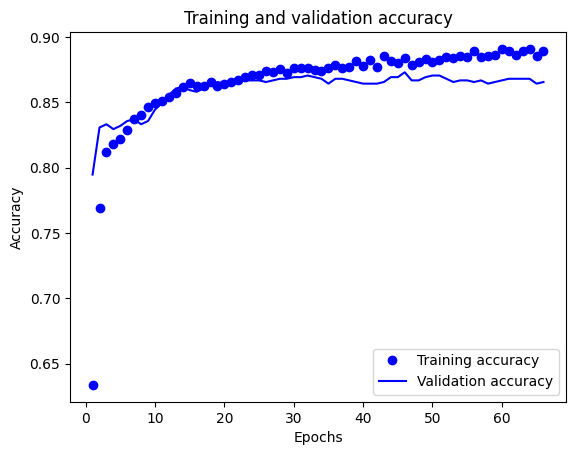

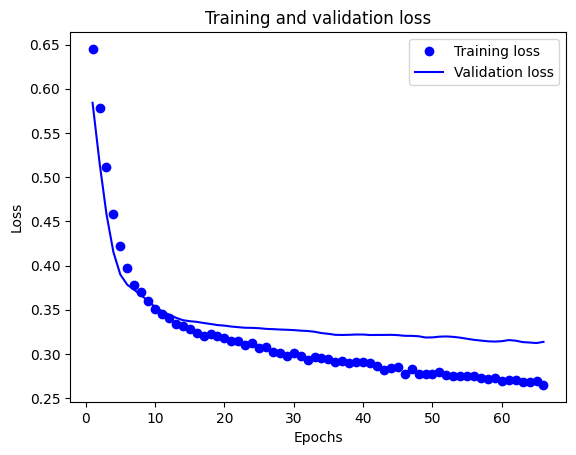

In [ ]:
# learning curve

# accuracy
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']


epochs = range(1, len(acc_2) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc_2, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc_2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#loss
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs = range(1, len(acc_2) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss_2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Baseline Model and Evaluation on Test Data
Calculate what a baseline prediction would be for the train and test partitions (a mean only model). Did your model do better than the baseline predictions? If so, you have a useful model!

In [ ]:
#Base line prediction for train
y_train=pd.DataFrame(y_train)
count_train=y_train.value_counts()

baseline_pred_train=count_train[0]/(count_train[0]+count_train[1])
print('Baseline prediction for train:/n', baseline_pred_train)

#Base line prediction for test
y_test=pd.DataFrame(y_test)
count_test=y_test.value_counts()

baseline_pred_test=count_train[0]/(count_train[0]+count_train[1])
print('Baseline prediction for test:/n', baseline_pred_test)

Baseline prediction for train:/n 0.5477803899875536
Baseline prediction for test:/n 0.5477803899875536


In [ ]:
## seeing how the model did! on train
preds2_train = np.round(model_2.predict(X2_train),0)

matrix = confusion_matrix(y_train,preds2_train)
matrix

226/226 [==============================] - 0s 2ms/step


array([[3576,  385],
       [ 409, 2861]])

In [ ]:
## seeing how the model did! on test
preds2_test = np.round(model_2.predict(X2_test),0)

matrix = confusion_matrix(y_test,preds2_test)
matrix

26/26 [==============================] - 0s 2ms/step


array([[386,  52],
       [ 50, 316]])

In [ ]:
#Printing the classification report on the train  data
print('Classification Report on Train:\n',classification_report(y_train , preds2_train))

#Printing the classification report on the test data
print('Classification Report on Test:\n',classification_report(y_test, preds2_test))

Classification Report on Train:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      3961
           1       0.88      0.87      0.88      3270

    accuracy                           0.89      7231
   macro avg       0.89      0.89      0.89      7231
weighted avg       0.89      0.89      0.89      7231

Classification Report on Test:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       438
           1       0.86      0.86      0.86       366

    accuracy                           0.87       804
   macro avg       0.87      0.87      0.87       804
weighted avg       0.87      0.87      0.87       804

